In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv(r"C:\\Users\HP\Downloads\Netflix_dataset.csv")


In [125]:
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [126]:
print(df.describe())

       release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000


In [127]:
print(df.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


#number of NA values

In [128]:
print(df.isna().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


In [129]:
# removing NA values: for cast and director column replace NA with "No Data"
#                    :for Country , date_added and rating replace NA with "mode of that column"

In [130]:
df['cast'].replace(np.nan, 'No Data', inplace=True)
df['director'].replace(np.nan, 'No Data', inplace=True)

df['country']=df['country'].fillna(df['country'].mode()[0])
df['date_added']=df['date_added'].fillna(df['date_added'].mode()[0])
df['rating']=df['rating'].fillna(df['rating'].mode()[0])


In [131]:
print(df.isna().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [132]:
#count of TV shows & Movies type

In [133]:
x=df['type'].value_counts().reset_index()
x

,index,type
0,Movie,5377
1,TV Show,2410


In [134]:
#percentage of TV shows & Movies type

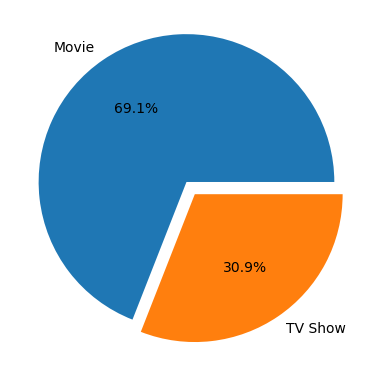

In [135]:
plt.pie(x['type'],labels=x['index'],autopct="%1.1f%%",explode=[0.1,0])

plt.show()


In [136]:
# Top 10 country with most content

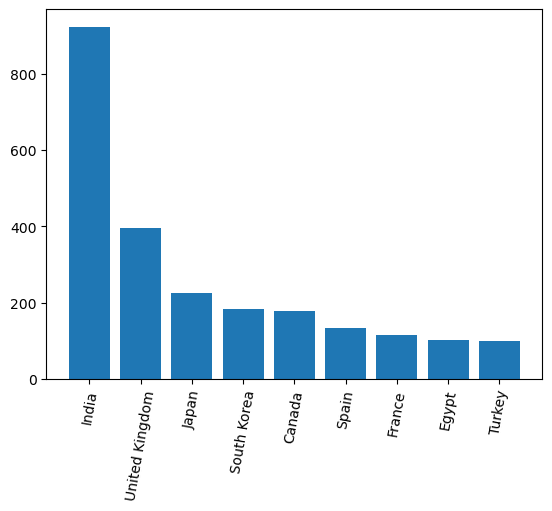

In [137]:
df.dropna(subset=['country'],inplace=True)

cnt=df['country'].value_counts()[1:10]

plt.bar(cnt.index, cnt.values)

plt.xticks(rotation=80)

plt.show()

In [138]:
# years having most content added

<BarContainer object of 14 artists>

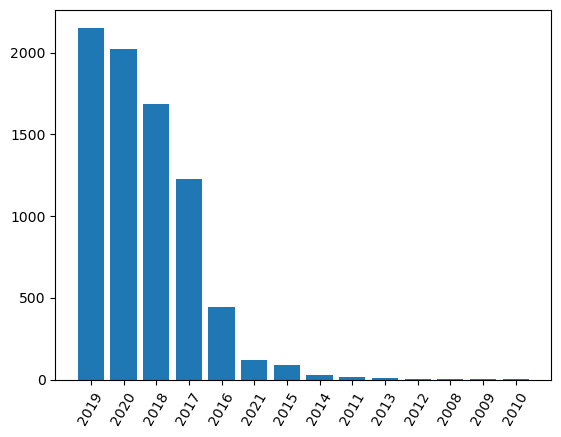

In [139]:
df.dropna(subset=['date_added'],inplace=True)

year=df['date_added'].apply(lambda x: x.split(',')[-1].strip()).value_counts()

plt.xticks(rotation=60)

plt.bar(year.index , year.values)



In [140]:
# most popular content in India

# 1- what kind of content is most popular

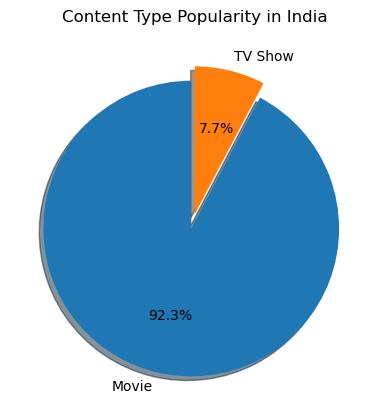

In [141]:

india_data = df[df['country'] == 'India']

content_counts = india_data['type'].value_counts()
plt.pie(content_counts, labels=content_counts.index, autopct='%1.1f%%', shadow=True, startangle=90,explode=[0.1,0])
plt.title('Content Type Popularity in India')
plt.show()


In [142]:
# 2- What type of rating is more popular. If it's teens or adults or kids.

('Movie', 'TV-14')


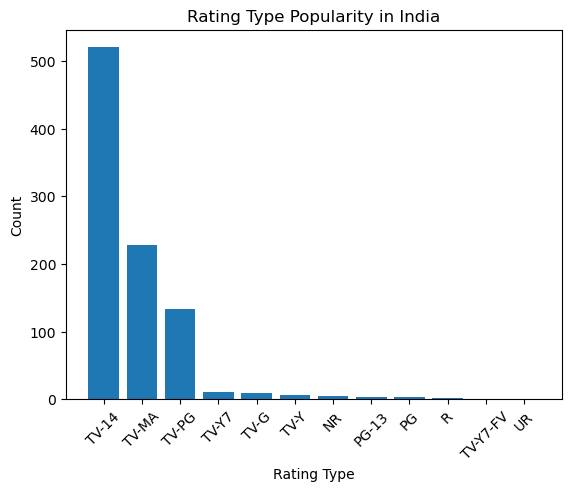

In [147]:
rating_counts = india_data['rating'].value_counts()
plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel('Rating Type')
plt.ylabel('Count')
plt.title('Rating Type Popularity in India')
plt.xticks(rotation=45)

most_popular_content_type = content_counts.idxmax()
most_popular_rating_type = rating_counts.idxmax()

# Step 6: Return the output in tuple format
output_tuple = (most_popular_content_type, most_popular_rating_type)
print(output_tuple)


In [145]:
# Longest movie Duration

In [146]:

df = df[df['type'] == 'Movie']


df['duration'] = df['duration'].astype(str)


df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]))


mx_indx = df['duration'].idxmax()


print(tuple(df.loc[mx_indx, ['title', 'release_year']]))


('Black Mirror: Bandersnatch', 2018)
